In [3]:
import matplotlib.pyplot as plt
from tensorflow import keras

from data import get_datasets
from utils import plot_slice, plot_animated_volume
from model import build_autoencoder

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 7]

In [4]:
autoencoder = build_autoencoder()
autoencoder.load_weights("models/20201014-214828/best_epoch_ckpt")
#autoencoder = keras.models.load_model("models/20201006-002251/")
autoencoder.layers[0].summary()
autoencoder.layers[1].summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 248, 128, 128, 1) 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 248, 128, 128, 16) 448       
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 248, 128, 128, 16) 0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 124, 64, 64, 16)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 124, 64, 64, 32)   13856     
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 124, 64, 64, 32)   0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 62, 32, 32, 32)    0   

In [5]:
train_dataset, val_dataset, test_dataset = get_datasets()
test_dataset

<BatchDataset shapes: (None, None, None, None, 1), types: tf.float32>

In [7]:
original = next(iter(test_dataset.skip(1)))
encoder_out = autoencoder.layers[0](original, training=False)
decoder_out = autoencoder.layers[1](encoder_out, training=False)
batch_index = 0

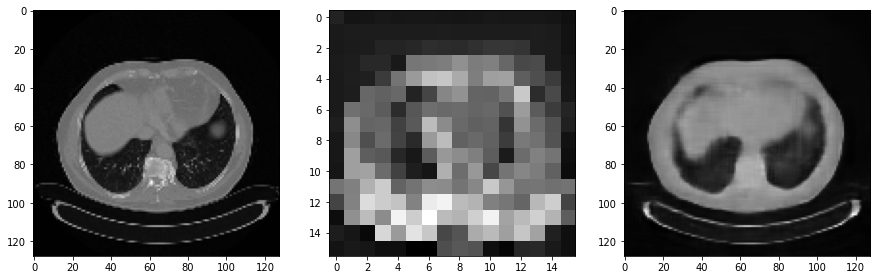

In [8]:
z_index = 10
fig, ax = plt.subplots(ncols=3)
plot_slice(original, batch_index, z_index, ax[0])
plot_slice(encoder_out, batch_index, encoder_out.shape[1] // 3, ax[1])
plot_slice(decoder_out, batch_index, z_index, ax[2])

In [9]:
plot_animated_volume(original, batch_index)

In [10]:
plot_animated_volume(encoder_out, batch_index, fps=10)

In [11]:
plot_animated_volume(decoder_out, batch_index)